In [1]:
from htn_ibkh import extract_htn_ibkh_subgraph, align_ibkh_to_mimic
from htn_mimic import build_htn_icu_cohort

cohort = build_htn_icu_cohort()
nodes, edges = extract_htn_ibkh_subgraph()  # iBKH 子图

# 看看子图
nodes.head(), edges.head()

# 和 MIMIC 宽表的对齐建议
alignment = align_ibkh_to_mimic(nodes, cohort.columns)
alignment


e:\PHD\01\htn_mimic.py:21: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  prescriptions = pd.read_csv(


{'exposures': [{'id': 'DrugBank:DB01029',
   'name': 'Irbesartan',
   'maps_to': 'arb_exposed'},
  {'id': 'DrugBank:DB00492', 'name': 'Fosinopril', 'maps_to': 'acei_exposed'},
  {'id': 'DrugBank:DB00876', 'name': 'Eprosartan', 'maps_to': 'arb_exposed'},
  {'id': 'DrugBank:DB00178', 'name': 'Ramipril', 'maps_to': 'acei_exposed'},
  {'id': 'DrugBank:DB00691', 'name': 'Moexipril', 'maps_to': 'acei_exposed'},
  {'id': 'DrugBank:DB00678', 'name': 'Losartan', 'maps_to': 'arb_exposed'},
  {'id': 'DrugBank:DB01197', 'name': 'Captopril', 'maps_to': 'acei_exposed'},
  {'id': 'DrugBank:DB00177', 'name': 'Valsartan', 'maps_to': 'arb_exposed'},
  {'id': 'DrugBank:DB00881', 'name': 'Quinapril', 'maps_to': 'acei_exposed'},
  {'id': 'DrugBank:DB00584', 'name': 'Enalapril', 'maps_to': 'acei_exposed'},
  {'id': 'DrugBank:DB00519',
   'name': 'Trandolapril',
   'maps_to': 'acei_exposed'},
  {'id': 'DrugBank:DB00722', 'name': 'Lisinopril', 'maps_to': 'acei_exposed'},
  {'id': 'DrugBank:DB00542', 'name': '

In [2]:
cohort = cohort.dropna()

In [3]:
cohort.head(100)

,subject_id,hadm_id,stay_id,age,sex,race,bmi_omr,clinic_bp,clinic_sbp,clinic_dbp,...,glucose_baseline,sodium_baseline,diabetes,ckd,cad,heart_failure,acei_exposed,arb_exposed,hospital_mortality,icu_los_days
0,10000690,25860671,37081114,86,F,WHITE,23.0,130/68,130.0,68.0,...,77.0,137.0,0,0,1,1,0,0,0,3.893252
1,10000980,26913865,39765666,73,F,BLACK/AFRICAN AMERICAN,31.8,131/75,131.0,75.0,...,144.0,139.0,1,1,1,1,1,0,0,0.497535
5,10001884,26184834,37510196,68,F,BLACK/AFRICAN AMERICAN,27.7,110/70,110.0,70.0,...,148.0,136.0,0,0,0,0,0,0,1,9.171817
6,10002013,23581541,39060235,53,F,OTHER,39.3,168/75,168.0,75.0,...,216.0,137.0,1,0,1,1,0,0,0,1.314352
7,10002155,20345487,32358465,80,F,WHITE,20.5,113/48,113.0,48.0,...,166.0,120.0,0,1,1,0,0,0,1,0.858576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,10032409,22851103,36698870,73,F,BLACK/AFRICAN AMERICAN,27.6,120/80,120.0,80.0,...,310.0,126.0,1,0,0,0,0,1,0,0.913229
214,10032409,24735796,35929854,73,F,BLACK/AFRICAN AMERICAN,24.9,96/50,96.0,50.0,...,303.0,134.0,1,0,1,0,0,0,0,2.939271
215,10032409,26423972,31822221,73,F,BLACK/AFRICAN AMERICAN,29.3,140/78,140.0,78.0,...,115.0,139.0,1,0,0,1,0,0,0,2.321956
216,10032409,28020206,32702054,73,F,BLACK/AFRICAN AMERICAN,24.9,131/65,131.0,65.0,...,453.0,135.0,1,0,0,1,0,0,1,8.784178


In [4]:
from htn_mimic import example_ps_weighting
# 2) 用 PS 加权估计 ACEI -> 住院死亡 的 ATE
result = example_ps_weighting(cohort)
result

{'n': 24850,
 'treated_rate': 0.12772635814889335,
 'outcome_rate': 0.12422535211267606,
 'ate_acei_on_hosp_mortality': -0.08177887071861012}

In [5]:
cols = [
    "age", "sex", "bmi_omr", "clinic_sbp", "clinic_dbp",
    "creatinine_baseline", "bun_baseline", "glucose_baseline",
    "diabetes", "ckd", "cad", "heart_failure",
    "acei_exposed", "arb_exposed",
    "hospital_mortality",
]

df = cohort[cols].copy()
df["sex_female"] = (df["sex"] == "F").astype(int)
df = df.drop(columns=["sex"])
df.head()


,age,bmi_omr,clinic_sbp,clinic_dbp,creatinine_baseline,bun_baseline,glucose_baseline,diabetes,ckd,cad,heart_failure,acei_exposed,arb_exposed,hospital_mortality,sex_female
0,86,23.0,130.0,68.0,0.9,21.0,77.0,0,0,1,1,0,0,0,1
1,73,31.8,131.0,75.0,2.2,38.0,144.0,1,1,1,1,1,0,0,1
5,68,27.7,110.0,70.0,1.1,30.0,148.0,0,0,0,0,0,0,1,1
6,53,39.3,168.0,75.0,1.1,16.0,216.0,1,0,1,1,0,0,0,1
7,80,20.5,113.0,48.0,1.4,47.0,166.0,0,1,1,0,0,0,1,1


In [6]:
df.head(20)

,age,bmi_omr,clinic_sbp,clinic_dbp,creatinine_baseline,bun_baseline,glucose_baseline,diabetes,ckd,cad,heart_failure,acei_exposed,arb_exposed,hospital_mortality,sex_female
0,86,23.0,130.0,68.0,0.9,21.0,77.0,0,0,1,1,0,0,0,1
1,73,31.8,131.0,75.0,2.2,38.0,144.0,1,1,1,1,1,0,0,1
5,68,27.7,110.0,70.0,1.1,30.0,148.0,0,0,0,0,0,0,1,1
6,53,39.3,168.0,75.0,1.1,16.0,216.0,1,0,1,1,0,0,0,1
7,80,20.5,113.0,48.0,1.4,47.0,166.0,0,1,1,0,0,0,1,1
9,80,21.4,99.0,51.0,2.5,63.0,106.0,0,1,1,1,0,0,0,1
11,80,20.0,131.0,78.0,0.3,14.0,93.0,0,0,0,0,0,0,0,1
12,80,20.0,131.0,78.0,0.4,12.0,96.0,0,0,0,1,1,0,0,1
13,80,20.0,131.0,78.0,0.8,13.0,99.0,0,0,0,0,0,0,0,1
14,80,20.0,131.0,78.0,0.5,35.0,183.0,0,0,0,0,0,0,0,1


c:\Users\兰苏\.conda\envs\causal_test\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Depth=9, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 2231.88it/s]


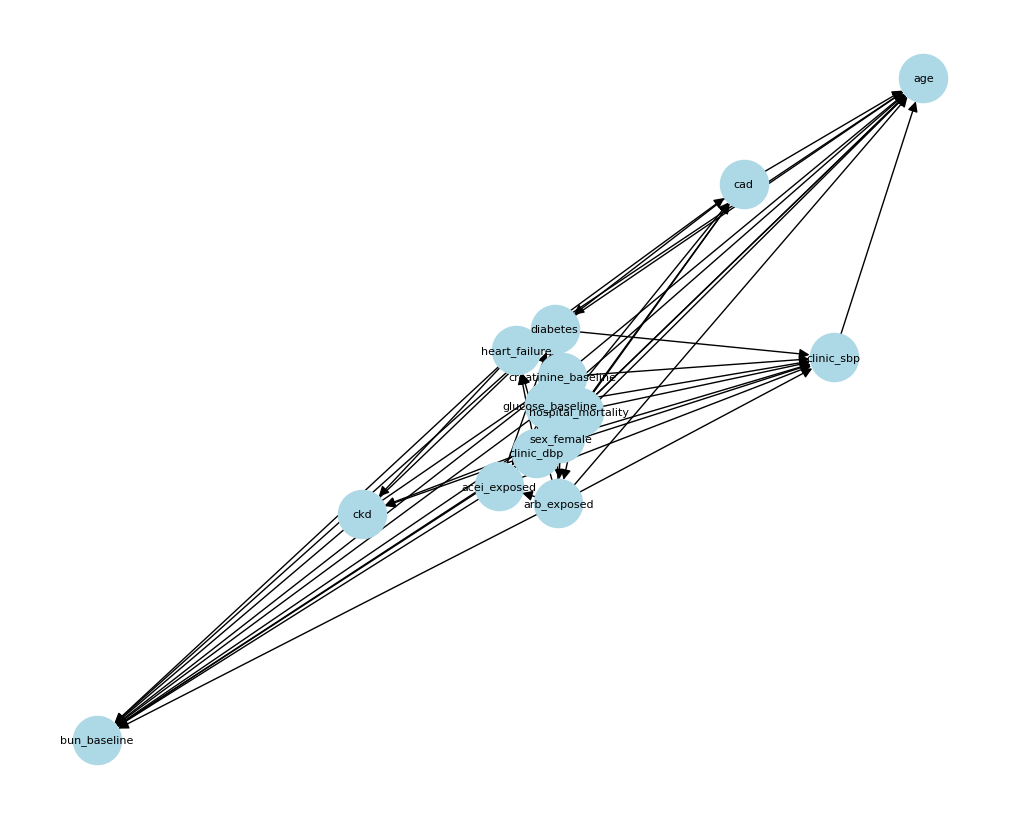

In [7]:
from causallearn.search.ConstraintBased.PC import pc
from causallearn.utils.cit import fisherz
from causallearn.utils.GraphUtils import GraphUtils
import matplotlib.pyplot as plt
import networkx as nx

data = df.values  # df 是你前面 dropna 后的 DataFrame
cg = pc(data, alpha=0.05, indep_test=fisherz)

# 从 pydot 拿边，再映射到列名
dot = GraphUtils.to_pydot(cg.G)
cols = df.columns.tolist()
edges_named = []
for e in dot.get_edges():
    src = str(e.get_source()).replace('"', '')
    dst = str(e.get_destination()).replace('"', '')
    edges_named.append((cols[int(src)], cols[int(dst)]))

edges_named  # 看学到的有向边（已用变量名）

# 画图
G_nx = nx.DiGraph()
G_nx.add_edges_from(edges_named)

plt.figure(figsize=(10, 8))
nx.draw(
    G_nx,
    with_labels=True,
    node_size=1200,
    node_color="lightblue",
    font_size=8,
    arrowsize=15,
)
plt.axis("off")
plt.show()


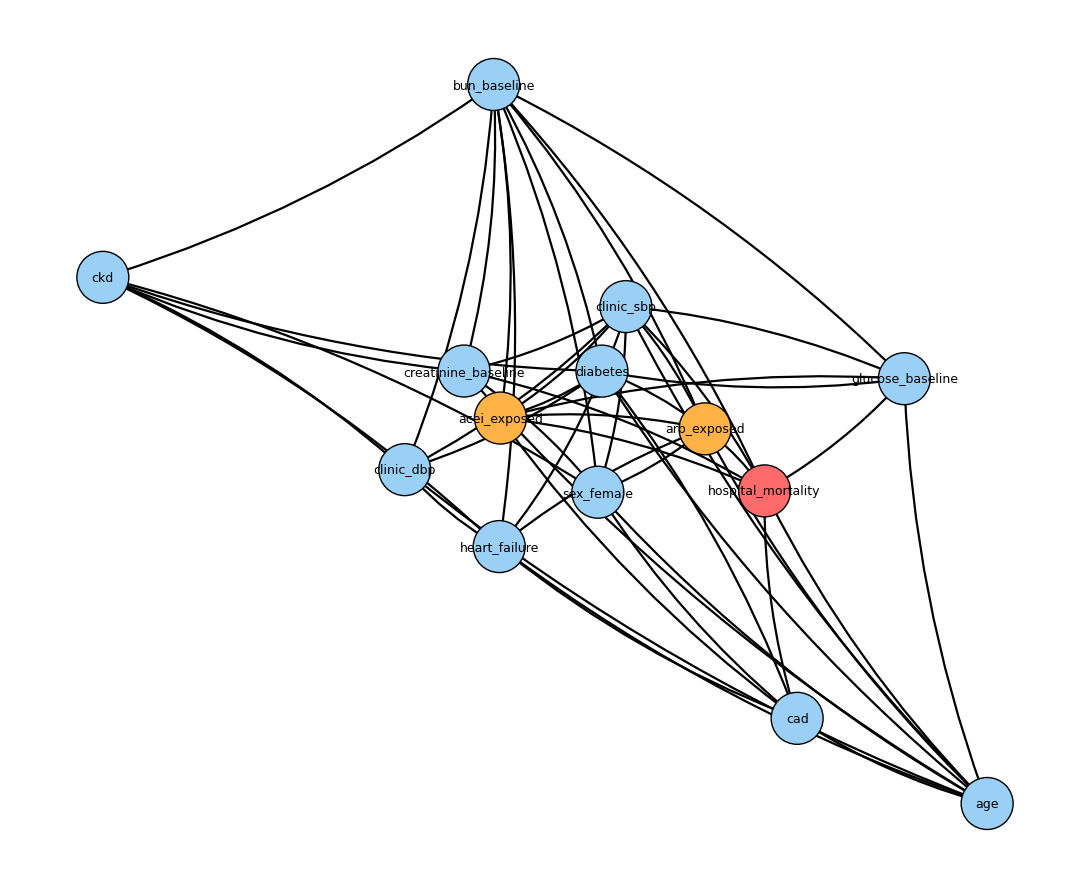

{'nodes': [{'id': 'clinic_sbp', 'type': 'risk'},
  {'id': 'age', 'type': 'risk'},
  {'id': 'clinic_dbp', 'type': 'risk'},
  {'id': 'creatinine_baseline', 'type': 'risk'},
  {'id': 'glucose_baseline', 'type': 'risk'},
  {'id': 'diabetes', 'type': 'risk'},
  {'id': 'cad', 'type': 'risk'},
  {'id': 'heart_failure', 'type': 'risk'},
  {'id': 'arb_exposed', 'type': 'exposure'},
  {'id': 'hospital_mortality', 'type': 'outcome'},
  {'id': 'sex_female', 'type': 'risk'},
  {'id': 'acei_exposed', 'type': 'exposure'},
  {'id': 'bun_baseline', 'type': 'risk'},
  {'id': 'ckd', 'type': 'risk'}],
 'edges': [{'src': 'clinic_sbp', 'dst': 'age', 'relation': 'causal_candidate'},
  {'src': 'clinic_dbp', 'dst': 'age', 'relation': 'causal_candidate'},
  {'src': 'clinic_dbp', 'dst': 'clinic_sbp', 'relation': 'causal_candidate'},
  {'src': 'clinic_dbp', 'dst': 'bun_baseline', 'relation': 'causal_candidate'},
  {'src': 'clinic_dbp', 'dst': 'diabetes', 'relation': 'causal_candidate'},
  {'src': 'clinic_dbp', 'd

In [8]:
import matplotlib.pyplot as plt
import networkx as nx
import json

# ------------- 1) 从 PC 结果构图（沿用你已有的 edges_named）-------------
G_nx = nx.DiGraph()
G_nx.add_edges_from(edges_named)

# 分组：暴露 / 结局 / 其他
exposures = {"acei_exposed", "arb_exposed"}
outcomes = {"hospital_mortality", "icu_los_days"}
node_colors = []
color_map = {"exposure": "#ffb347", "outcome": "#ff6b6b", "other": "#9ad0f5"}

for n in G_nx.nodes:
    if n in exposures:
        node_colors.append(color_map["exposure"])
    elif n in outcomes:
        node_colors.append(color_map["outcome"])
    else:
        node_colors.append(color_map["other"])

# 布局用 spring，固定随机种子方便复现
pos = nx.spring_layout(G_nx, seed=42, k=0.6)

plt.figure(figsize=(11, 9))
nx.draw_networkx_nodes(G_nx, pos, node_color=node_colors, node_size=1400, edgecolors="black")
nx.draw_networkx_labels(G_nx, pos, font_size=9)
nx.draw_networkx_edges(G_nx, pos, arrowstyle="->", arrowsize=18, width=1.6, connectionstyle="arc3,rad=0.08")
plt.axis("off")
plt.tight_layout()
plt.show()
# 如需保存：plt.savefig("htn_pc_pretty.png", dpi=200, bbox_inches="tight")

# ------------- 2) 导出节点/三元组 JSON -------------
nodes_out = []
for n in G_nx.nodes:
    if n in exposures:
        ntype = "exposure"
    elif n in outcomes:
        ntype = "outcome"
    else:
        ntype = "risk"
    nodes_out.append({"id": n, "type": ntype})

edges_out = []
for src, dst in G_nx.edges:
    edges_out.append({"src": src, "dst": dst, "relation": "causal_candidate"})

export = {"nodes": nodes_out, "edges": edges_out}
with open("htn_pc_graph.json", "w", encoding="utf-8") as f:
    json.dump(export, f, ensure_ascii=False, indent=2)

export  # 查看摘要


In [9]:
from causallearn.search.ConstraintBased.PC import pc
from causallearn.utils.cit import fisherz
from causallearn.graph.Endpoint import Endpoint
import networkx as nx
import matplotlib.pyplot as plt
import json

data = df.values
cg = pc(data, alpha=0.05, indep_test=fisherz)

cols = df.columns.tolist()

# 1. 建立「PC节点名 -> 列名」的映射（按 get_nodes 的顺序对齐 df 列）
nodes_pc = cg.G.get_nodes()  # [X0, X1, ...]
name_to_col = {node.get_name(): cols[i] for i, node in enumerate(nodes_pc)}

# 2. 抽取确定方向的边，并映射到列名
edges_named = []
for e in cg.G.get_graph_edges():
    n1_name = name_to_col.get(e.get_node1().get_name())
    n2_name = name_to_col.get(e.get_node2().get_name())
    if n1_name is None or n2_name is None:
        continue

    ep1 = e.get_endpoint1()
    ep2 = e.get_endpoint2()

    if ep1 == Endpoint.TAIL and ep2 == Endpoint.ARROW:      # n1 -> n2
        edges_named.append((n1_name, n2_name))
    elif ep1 == Endpoint.ARROW and ep2 == Endpoint.TAIL:    # n2 -> n1
        edges_named.append((n2_name, n1_name))

edges_named = list(set(edges_named))
edges_named  # 看看有向边


Depth=9, working on node 14: 100%|██████████| 15/15 [00:00<00:00, 2500.68it/s]


[('clinic_dbp', 'ckd'),
 ('hospital_mortality', 'age'),
 ('acei_exposed', 'cad'),
 ('cad', 'age'),
 ('arb_exposed', 'diabetes'),
 ('clinic_dbp', 'age'),
 ('arb_exposed', 'bun_baseline'),
 ('glucose_baseline', 'clinic_sbp'),
 ('cad', 'diabetes'),
 ('hospital_mortality', 'bun_baseline'),
 ('sex_female', 'ckd'),
 ('clinic_dbp', 'diabetes'),
 ('ckd', 'creatinine_baseline'),
 ('arb_exposed', 'heart_failure'),
 ('hospital_mortality', 'cad'),
 ('diabetes', 'age'),
 ('clinic_dbp', 'bun_baseline'),
 ('sex_female', 'age'),
 ('acei_exposed', 'bun_baseline'),
 ('clinic_dbp', 'heart_failure'),
 ('diabetes', 'bun_baseline'),
 ('creatinine_baseline', 'clinic_sbp'),
 ('acei_exposed', 'clinic_sbp'),
 ('sex_female', 'bun_baseline'),
 ('clinic_sbp', 'age'),
 ('glucose_baseline', 'acei_exposed'),
 ('arb_exposed', 'clinic_sbp'),
 ('sex_female', 'cad'),
 ('heart_failure', 'ckd'),
 ('hospital_mortality', 'clinic_sbp'),
 ('glucose_baseline', 'age'),
 ('clinic_dbp', 'clinic_sbp'),
 ('hospital_mortality', 'gluc

In [10]:
edges_named  # 看看有向边

[('clinic_dbp', 'ckd'),
 ('hospital_mortality', 'age'),
 ('acei_exposed', 'cad'),
 ('cad', 'age'),
 ('arb_exposed', 'diabetes'),
 ('clinic_dbp', 'age'),
 ('arb_exposed', 'bun_baseline'),
 ('glucose_baseline', 'clinic_sbp'),
 ('cad', 'diabetes'),
 ('hospital_mortality', 'bun_baseline'),
 ('sex_female', 'ckd'),
 ('clinic_dbp', 'diabetes'),
 ('ckd', 'creatinine_baseline'),
 ('arb_exposed', 'heart_failure'),
 ('hospital_mortality', 'cad'),
 ('diabetes', 'age'),
 ('clinic_dbp', 'bun_baseline'),
 ('sex_female', 'age'),
 ('acei_exposed', 'bun_baseline'),
 ('clinic_dbp', 'heart_failure'),
 ('diabetes', 'bun_baseline'),
 ('creatinine_baseline', 'clinic_sbp'),
 ('acei_exposed', 'clinic_sbp'),
 ('sex_female', 'bun_baseline'),
 ('clinic_sbp', 'age'),
 ('glucose_baseline', 'acei_exposed'),
 ('arb_exposed', 'clinic_sbp'),
 ('sex_female', 'cad'),
 ('heart_failure', 'ckd'),
 ('hospital_mortality', 'clinic_sbp'),
 ('glucose_baseline', 'age'),
 ('clinic_dbp', 'clinic_sbp'),
 ('hospital_mortality', 'gluc

C:\Users\兰苏\AppData\Local\Temp\ipykernel_44524\3153831900.py:17: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


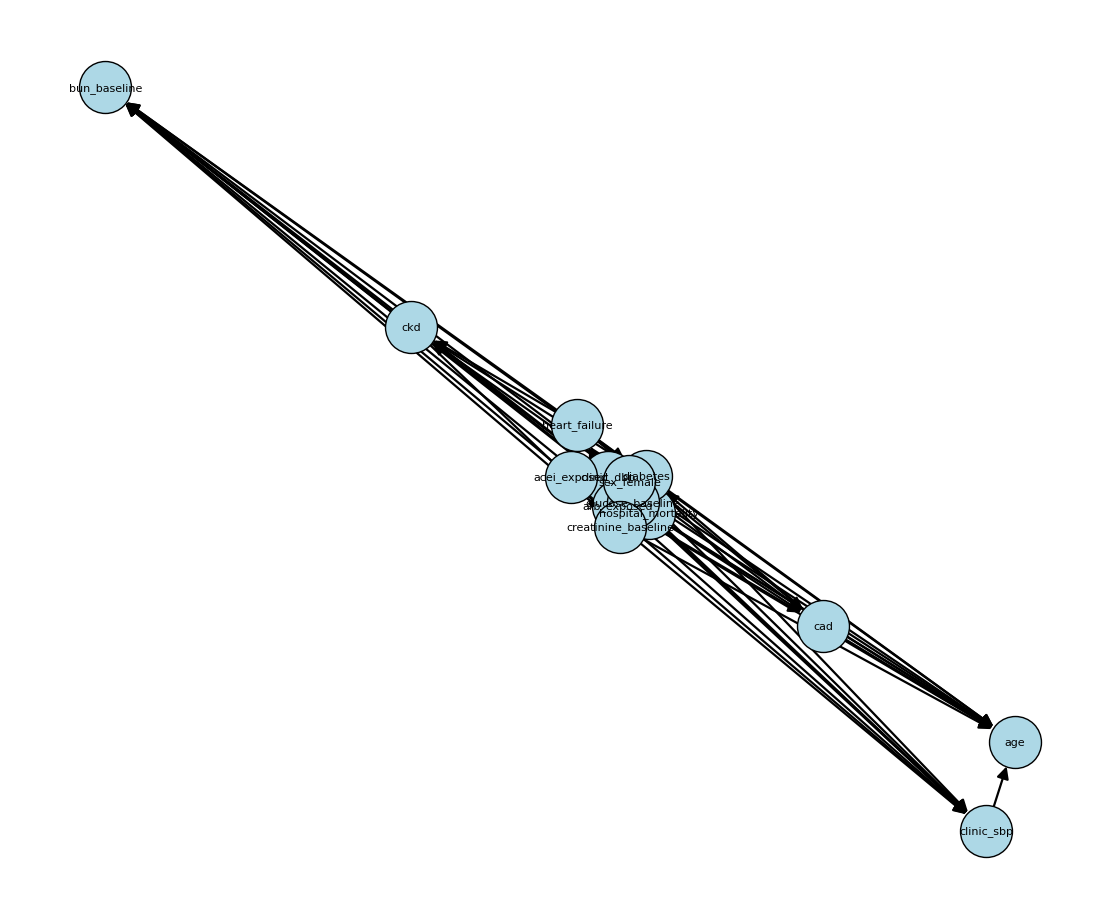

In [11]:
# 画图
G_nx = nx.DiGraph()
G_nx.add_edges_from(edges_named)

plt.figure(figsize=(11, 9))
nx.draw(
    G_nx,
    with_labels=True,
    node_size=1400,
    node_color="lightblue",
    edgecolors="black",
    font_size=8,
    arrowsize=18,
    width=1.6,
)
plt.axis("off")
plt.tight_layout()
plt.show()

# 导出三元组 JSON
import json
nodes_out = [{"id": n, "type": "other"} for n in G_nx.nodes]
edges_out = [{"src": s, "dst": t, "relation": "causal_candidate"} for s, t in edges_named]
with open("htn_pc_graph.json", "w", encoding="utf-8") as f:
    json.dump({"nodes": nodes_out, "edges": edges_out}, f, ensure_ascii=False, indent=2)


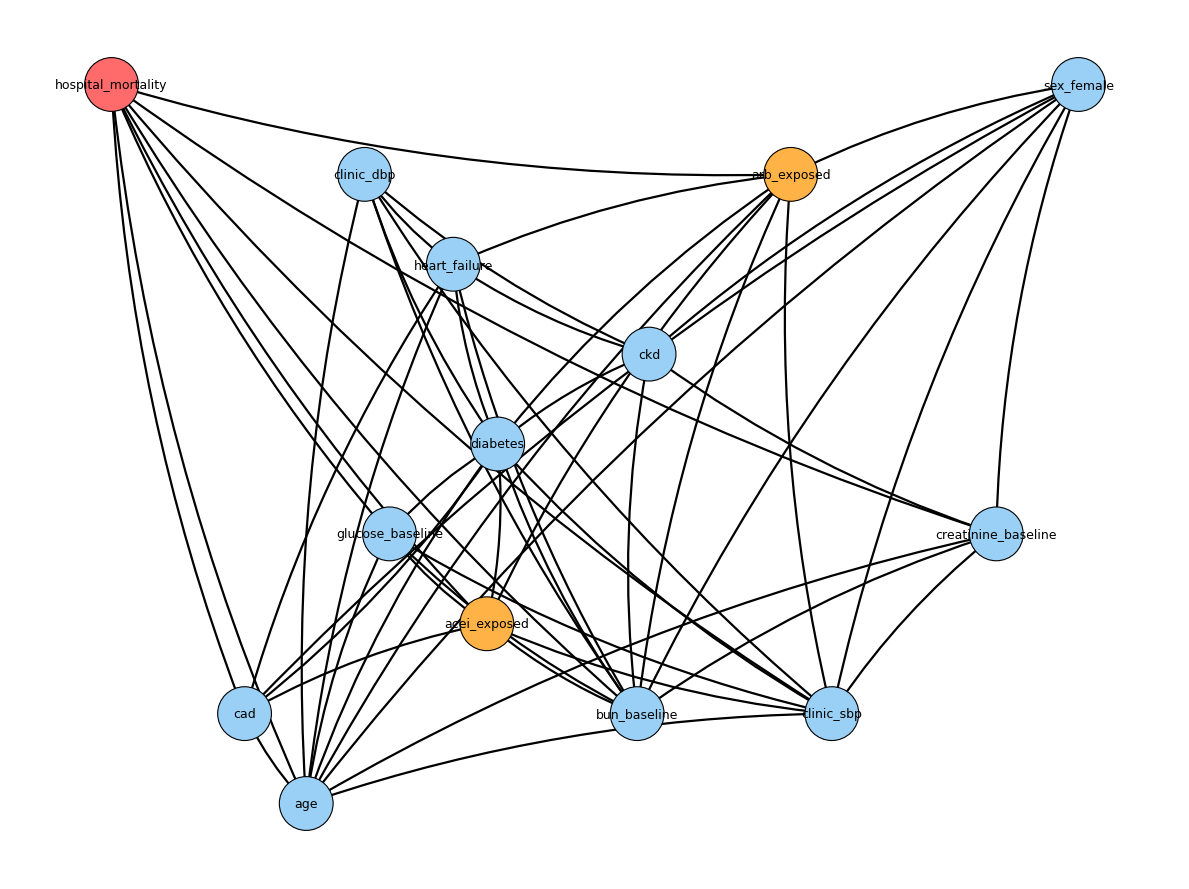

In [12]:
import networkx as nx
import matplotlib.pyplot as plt

# 1) 根据 edges_named 构图
G_nx = nx.DiGraph()
G_nx.add_edges_from(edges_named)

# 2) 节点分组上色：暴露 / 结局 / 其他
exposures = {"acei_exposed", "arb_exposed"}
outcomes = {"hospital_mortality", "icu_los_days"}

node_colors = []
color_map = {"exposure": "#ffb347", "outcome": "#ff6b6b", "other": "#9ad0f5"}
for n in G_nx.nodes:
    if n in exposures:
        node_colors.append(color_map["exposure"])
    elif n in outcomes:
        node_colors.append(color_map["outcome"])
    else:
        node_colors.append(color_map["other"])

# 3) 尝试用 graphviz 的层次布局，不行就退回 spring_layout
try:
    from networkx.drawing.nx_pydot import graphviz_layout
    pos = graphviz_layout(G_nx, prog="dot")
except Exception:
    pos = nx.spring_layout(G_nx, k=0.8, iterations=300, seed=42)

# 4) 画图（节点尽量不重合）
plt.figure(figsize=(12, 9))
nx.draw_networkx_nodes(
    G_nx, pos,
    node_color=node_colors,
    node_size=1500,
    edgecolors="black",
    linewidths=0.8,
)
nx.draw_networkx_labels(G_nx, pos, font_size=9)
nx.draw_networkx_edges(
    G_nx, pos,
    arrowstyle="->",
    arrowsize=18,
    width=1.6,
    connectionstyle="arc3,rad=0.08",  # 轻微弯曲，减少重叠
)
plt.axis("off")
plt.tight_layout()
plt.show()


In [13]:
import networkx as nx

# G_nx 是刚才画图用的那个有向图
nx.is_directed_acyclic_graph(G_nx)


False

In [14]:
list(nx.simple_cycles(G_nx))


[['cad', 'diabetes', 'glucose_baseline', 'acei_exposed'],
 ['glucose_baseline', 'acei_exposed', 'diabetes']]

是否为DAG: True
原始边数: 53, DAG边数: 51
移除的边数: 2


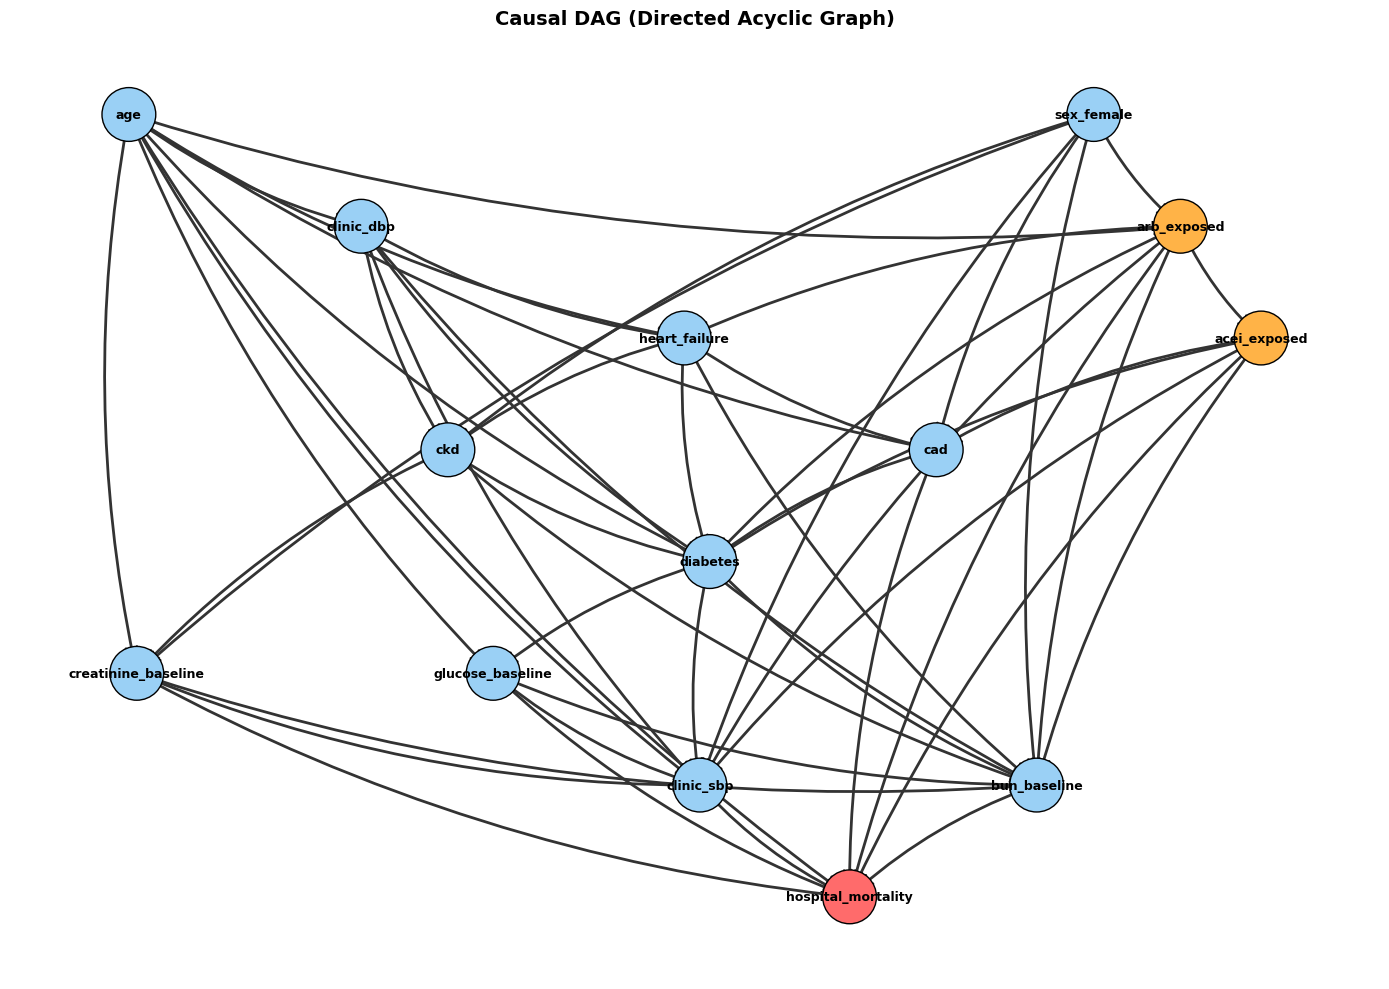


DAG已导出到: htn_dag_graph.json


[('clinic_dbp', 'ckd'),
 ('age', 'hospital_mortality'),
 ('acei_exposed', 'cad'),
 ('age', 'cad'),
 ('arb_exposed', 'diabetes'),
 ('age', 'clinic_dbp'),
 ('arb_exposed', 'bun_baseline'),
 ('glucose_baseline', 'clinic_sbp'),
 ('cad', 'diabetes'),
 ('bun_baseline', 'hospital_mortality')]

In [15]:
import networkx as nx
import matplotlib.pyplot as plt
import json

# 方法1: 基于领域知识手动移除不合理的边
# 从因果关系角度，diabetes(糖尿病) -> glucose_baseline(基线血糖) 更合理
# 而 glucose_baseline -> diabetes 是反向的，应该移除

def convert_to_dag_manual(edges_list):
    """
    基于医学领域知识微调方向，并移除不合理的因果边，破除环路。
    """
    edges_filtered = []

    # 需要强制约束方向的节点：
    # - roots: 只能作为“起点”（只出不进），如 age, sex_female
    # - sinks: 只能作为“终点”（只进不出），如 hospital_mortality
    roots = {"age", "sex_female"}
    sinks = {"hospital_mortality"}

    # 先列出需要直接移除的极不合理的边
    edges_to_remove = {
        ('glucose_baseline', 'diabetes'),      # 糖尿病导致血糖升高，不是反过来
        ('glucose_baseline', 'acei_exposed'),  # ACEI用药不应该由血糖直接决定
    }

    def _apply_direction_constraints(src, dst):
        """根据 root / sink 约束决定边的方向，必要时翻转或丢弃。"""
        # 如果 src 是 sink，或者 dst 是 root，则当前方向不允许
        if src in sinks or dst in roots:
            # 尝试翻转方向
            rev_src, rev_dst = dst, src
            # 翻转后如果仍然违反约束，就完全丢弃这条边
            if rev_src in sinks or rev_dst in roots:
                return None
            return (rev_src, rev_dst)
        return (src, dst)

    for (src, dst) in edges_list:
        if (src, dst) in edges_to_remove:
            continue

        adjusted = _apply_direction_constraints(src, dst)
        if adjusted is None:
            continue

        edges_filtered.append(adjusted)

    # 去重，保持顺序
    seen = set()
    unique_edges = []
    for e in edges_filtered:
        if e not in seen:
            seen.add(e)
            unique_edges.append(e)

    return unique_edges

# 方法2: 使用拓扑排序 + 最小边移除算法
def convert_to_dag_algorithmic(G):
    """
    自动移除最少的边来破环
    基于边的"强度"（这里简化为反向拓扑序）
    """
    G_copy = G.copy()
    
    while not nx.is_directed_acyclic_graph(G_copy):
        # 找到所有环
        try:
            cycle = nx.find_cycle(G_copy, orientation='original')
            # 移除环中的第一条边（可以优化为移除"最弱"的边）
            edge_to_remove = (cycle[0][0], cycle[0][1])
            print(f"移除边: {edge_to_remove}")
            G_copy.remove_edge(*edge_to_remove)
        except nx.NetworkXNoCycle:
            break
    
    return list(G_copy.edges())

# 使用方法1（推荐，基于领域知识）
edges_dag = convert_to_dag_manual(edges_named)

# 或使用方法2（自动算法）
# edges_dag = convert_to_dag_algorithmic(G_nx)

# 构建DAG
G_dag = nx.DiGraph()
G_dag.add_edges_from(edges_dag)

# 验证是否为DAG
print(f"是否为DAG: {nx.is_directed_acyclic_graph(G_dag)}")
print(f"原始边数: {len(edges_named)}, DAG边数: {len(edges_dag)}")
print(f"移除的边数: {len(edges_named) - len(edges_dag)}")

# 节点分组上色
exposures = {"acei_exposed", "arb_exposed"}
outcomes = {"hospital_mortality"}

node_colors = []
color_map = {"exposure": "#ffb347", "outcome": "#ff6b6b", "other": "#9ad0f5"}
for n in G_dag.nodes:
    if n in exposures:
        node_colors.append(color_map["exposure"])
    elif n in outcomes:
        node_colors.append(color_map["outcome"])
    else:
        node_colors.append(color_map["other"])

# 使用层次布局（DAG专用）
try:
    from networkx.drawing.nx_pydot import graphviz_layout
    pos = graphviz_layout(G_dag, prog="dot")
except Exception:
    # 如果没有graphviz，使用spring布局
    pos = nx.spring_layout(G_dag, k=0.8, iterations=300, seed=42)

# 绘制DAG
plt.figure(figsize=(14, 10))
nx.draw_networkx_nodes(
    G_dag, pos,
    node_color=node_colors,
    node_size=1500,
    edgecolors="black",
    linewidths=1.0,
)
nx.draw_networkx_labels(G_dag, pos, font_size=9, font_weight='bold')
nx.draw_networkx_edges(
    G_dag, pos,
    arrowstyle="->",
    arrowsize=20,
    width=2.0,
    edge_color='#333333',
    connectionstyle="arc3,rad=0.1",
)
plt.title("Causal DAG (Directed Acyclic Graph)", fontsize=14, fontweight='bold')
plt.axis("off")
plt.tight_layout()
plt.show()

# 导出DAG到JSON
nodes_out = []
for n in G_dag.nodes:
    if n in exposures:
        ntype = "exposure"
    elif n in outcomes:
        ntype = "outcome"
    else:
        ntype = "risk"
    nodes_out.append({"id": n, "type": ntype})

edges_out = [{"src": s, "dst": t, "relation": "causal"} for s, t in G_dag.edges()]

dag_export = {"nodes": nodes_out, "edges": edges_out}
with open("htn_dag_graph.json", "w", encoding="utf-8") as f:
    json.dump(dag_export, f, ensure_ascii=False, indent=2)

print("\nDAG已导出到: htn_dag_graph.json")
edges_dag[:10]  # 显示前10条边

In [16]:
# 基于 DAG 和 MIMIC 数据，为每条边估计 "上升/下降" 方向，并导出带符号的 DAG JSON
import json
from collections import defaultdict
from sklearn.linear_model import LogisticRegression, LinearRegression
import numpy as np
# 1) 为每个子节点收集父节点列表
parent_map = defaultdict(list)
for src, dst in edges_dag:
    parent_map[dst].append(src)
# 2) 基于 df 中的数据，对每条边估计符号
edge_effects = []  # 每项: {src, dst, effect}
for dst, parents in parent_map.items():
    # 只处理出现在 df 里的变量
    if dst not in df.columns:
        continue
    cols_use = parents + [dst]
    sub = df[cols_use].dropna()
    # 样本太少时不做估计
    if len(sub) < 50:
        for src in parents:
            edge_effects.append({"src": src, "dst": dst, "effect": "unknown"})
        continue
    y = sub[dst]
    X = sub[parents].values
    # 判断因变量是否为二元(0/1)
    unique_y = y.nunique()
    is_binary = unique_y <= 2
    try:
        if is_binary:
            model = LogisticRegression(max_iter=1000)
            model.fit(X, y.astype(int))
            coefs = model.coef_[0]
        else:
            model = LinearRegression()
            model.fit(X, y.values)
            coefs = model.coef_
        for i, src in enumerate(parents):
            coef = float(coefs[i])
            if coef > 0:
                effect = "increase"   # A 上升 -> B 也上升
            elif coef < 0:
                effect = "decrease"   # A 上升 -> B 下降
            else:
                effect = "unknown"
            edge_effects.append({"src": src, "dst": dst, "effect": effect})
    except Exception as e:
        print(f"skip {dst} due to error: {e}")
        for src in parents:
            edge_effects.append({"src": src, "dst": dst, "effect": "unknown"})
# 3) 构造 (src, dst) -> effect 的查找表
edge_effect_map = {(e["src"], e["dst"]): e["effect"] for e in edge_effects}
# 4) 读入已有的 htn_dag_graph.json，给每条边加上 effect 字段
with open("htn_dag_graph.json", "r", encoding="utf-8") as f:
    dag = json.load(f)
for e in dag["edges"]:
    key = (e["src"], e["dst"])
    e["effect"] = edge_effect_map.get(key, "unknown")
with open("htn_dag_graph_signed.json", "w", encoding="utf-8") as f:
    json.dump(dag, f, ensure_ascii=False, indent=2)
print("带上升/下降符号的 DAG 已导出到: htn_dag_graph_signed.json")
edge_effects[:10]


带上升/下降符号的 DAG 已导出到: htn_dag_graph_signed.json


[{'src': 'clinic_dbp', 'dst': 'ckd', 'effect': 'decrease'},
 {'src': 'sex_female', 'dst': 'ckd', 'effect': 'decrease'},
 {'src': 'heart_failure', 'dst': 'ckd', 'effect': 'increase'},
 {'src': 'age', 'dst': 'hospital_mortality', 'effect': 'increase'},
 {'src': 'bun_baseline', 'dst': 'hospital_mortality', 'effect': 'increase'},
 {'src': 'cad', 'dst': 'hospital_mortality', 'effect': 'decrease'},
 {'src': 'clinic_sbp', 'dst': 'hospital_mortality', 'effect': 'decrease'},
 {'src': 'glucose_baseline',
  'dst': 'hospital_mortality',
  'effect': 'increase'},
 {'src': 'arb_exposed', 'dst': 'hospital_mortality', 'effect': 'decrease'},
 {'src': 'creatinine_baseline',
  'dst': 'hospital_mortality',
  'effect': 'decrease'}]

In [17]:
import networkx as nx

# G_nx 是刚才画图用的那个有向图
nx.is_directed_acyclic_graph(G_dag)

True